In [1]:
import pandas as pd

df = pd.read_csv(r'kidneyChronic.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [3]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,258,362,317,323,339,250


In [4]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [5]:
import numpy as np
np.unique(df['age'])

array(['11', '12', '14', '15', '17', '19', '2', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '3', '30', '32', '33', '34',
       '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74',
       '75', '76', '78', '79', '8', '80', '81', '82', '83', '90', '?'],
      dtype=object)

In [53]:
df_m = df.copy()

In [54]:
df_m['age'].replace('?', np.nan, inplace = True)

In [55]:
df_m.isnull().sum()

age      9
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [56]:
df_m.replace('?', np.nan, inplace = True)

In [57]:
df_m.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [58]:
df_m.replace('notpresent', np.nan, inplace = True)

In [59]:
df_m.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc      358
ba       378
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [65]:
#In columns (rbc, pcc,ba,wbcc,rbcc) more than 25% are null, So dropping these values from data frame
df_m.drop(['rbc','pcc','ba','wbcc','rbcc'], inplace = True, axis = 1)
df_m

,age,bp,sg,al,su,pc,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,normal,121,36,1.2,NaN,NaN,15.4,44,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,normal,NaN,18,0.8,NaN,NaN,11.3,38,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,423,53,1.8,NaN,NaN,9.6,31,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,abnormal,117,56,3.8,111,2.5,11.2,32,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,106,26,1.4,NaN,NaN,11.6,35,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,74,25,1.1,142,3.2,12.2,39,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,normal,100,54,24,104,4,12.4,36,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,abnormal,410,31,1.1,NaN,NaN,12.4,44,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,abnormal,138,60,1.9,NaN,NaN,10.8,33,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,70,107,7.2,114,3.7,9.5,29,yes,yes,no,poor,no,yes,ckd


In [66]:
pd.set_option('display.max_columns', None)
df_m[df_m.bp.isnull()]

,age,bp,sg,al,su,pc,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
7,24,NaN,1.015,2,4,abnormal,410,31,1.1,NaN,NaN,12.4,44,no,yes,no,good,yes,no,ckd
75,5,NaN,1.015,1,0,normal,NaN,16,0.7,138,3.2,8.1,NaN,no,no,no,good,no,yes,ckd
132,50,NaN,NaN,NaN,NaN,NaN,219,176,13.8,136,4.5,8.6,24,yes,no,no,good,yes,yes,ckd
138,73,NaN,1.01,1,0,NaN,95,51,1.6,142,3.5,NaN,NaN,no,\tno,no,good,no,no,ckd
161,62,NaN,1.015,3,0,NaN,NaN,NaN,NaN,NaN,NaN,14.3,42,yes,yes,no,good,no,no,ckd
164,14,NaN,1.015,0,0,NaN,192,15,0.8,137,4.2,14.3,40,no,yes,no,poor,yes,no,ckd
185,4,NaN,1.02,1,0,normal,99,23,0.6,138,4.4,12,34,no,no,no,good,no,no,ckd
187,3,NaN,1.01,2,0,normal,NaN,22,0.7,NaN,NaN,10.7,34,no,no,no,good,no,no,ckd
188,8,NaN,NaN,NaN,NaN,NaN,80,66,2.5,142,3.6,12.2,38,no,\tno,no,good,no,no,ckd
215,2,NaN,1.01,3,0,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,yes,no,ckd


In [69]:
int_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv'] 
df_m[int_cols] = df_m[int_cols].apply(pd.to_numeric, errors='coerce')

In [71]:
df_m.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
pc        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [75]:
pd.get_dummies(df_m['pc'], prefix = 'pc')

,pc_abnormal,pc_normal
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,0
6,0,1
7,1,0
8,1,0
9,1,0


In [76]:
pd.get_dummies(df_m['htn'], prefix = 'htn')

,htn_no,htn_yes
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [78]:
pd.get_dummies(df_m['dm'], prefix = 'dm')

,dm_\tno,dm_\tyes,dm_ yes,dm_no,dm_yes
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,1,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [80]:
df_m['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [87]:
import re

df_m['dm'].replace(re' ', '', inplace = True)
df_m['dm'].value_counts()

SyntaxError: invalid syntax (<ipython-input-87-788af18d4e08>, line 3)

In [28]:
pd.set_option('display.max_rows', None)
df_m.age.value_counts(dropna = False)

60     19
65     17
50     12
48     12
55     12
47     11
62     10
45     10
54     10
56     10
59     10
70      9
34      9
61      9
NaN     9
46      9
71      8
64      8
57      8
68      8
73      8
63      7
67      7
72      7
30      7
42      6
35      6
44      6
43      6
33      6
69      6
66      5
75      5
51      5
58      5
53      5
41      5
52      5
76      5
24      4
80      4
39      4
40      4
23      4
74      3
8       3
37      3
38      3
29      3
25      3
17      3
32      3
19      2
15      2
36      2
20      2
21      2
5       2
28      2
49      2
12      2
79      1
11      1
26      1
6       1
14      1
22      1
7       1
83      1
78      1
82      1
27      1
4       1
81      1
3       1
2       1
90      1
Name: age, dtype: int64

In [30]:
df_m['class'].value_counts(dropna = False)

ckd       250
notckd    150
Name: class, dtype: int64

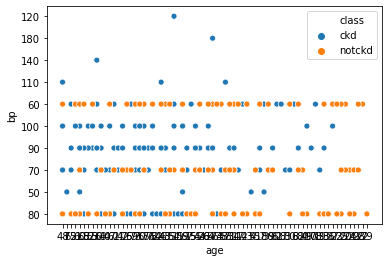

In [34]:
import seaborn as sns
sns.scatterplot(data=df_m, y="bp", x="age", hue="class")
# , style="time"b

In [39]:
df.rbc.value_counts()

normal      201
?           152
abnormal     47
Name: rbc, dtype: int64

In [38]:
df_m['age'] = pd.to_numeric(df['age'], errors='coerce')
df_m.dtypes

age      float64
bp        object
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv       object
wbcc      object
rbcc      object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [32]:
df_m.shape

(400, 25)

In [34]:
///df_m['age']

0      48
1       7
2      62
3      48
4      51
       ..
395    55
396    42
397    12
398    17
399    58
Name: age, Length: 400, dtype: object

In [41]:
df_m.age.unique()

array(['48', '7', '62', '51', '60', '68', '24', '52', '53', '50', '63',
       '40', '47', '61', '21', '42', '75', '69', nan, '73', '70', '65',
       '76', '72', '82', '46', '45', '35', '54', '11', '59', '67', '15',
       '55', '44', '26', '64', '56', '5', '74', '38', '58', '71', '34',
       '17', '12', '43', '41', '57', '8', '39', '66', '81', '14', '27',
       '83', '30', '4', '3', '6', '32', '80', '49', '90', '78', '19', '2',
       '33', '36', '37', '23', '25', '20', '29', '28', '22', '79'],
      dtype=object)

In [42]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [35]:
np.unique(df_m['age'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [39]:
if np.nan is None:
    print(1)